In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs
import cmocean as cmo
import os.path

mpl.rcParams['figure.figsize'] = 20, 8
mpl.rcParams['font.size'] = 20

In [2]:
def getpsstd(rname):
    """
    Compute standard deviation of daily surface pressure anomaly frpm climatology.
    
    Parameters
    ----------
    rname : str
        Name of run to plot

    Returns
    -------
    psstd : xarray DataArray
        standard deviation of surface pressure daily anomaly
    """
    ddir = '/glade/scratch/apauling/archive/' + rname + '/atm/proc/tseries/day_1'
    dfile = rname + '.cam.h1.PS.00010101-00301231.nc'
    ncF = os.path.join(ddir, dfile)
    ds = xr.open_dataset(ncF)
    
    ps = ds['PS']
    # Compute climatology
    psclimo = ps.groupby('time.dayofyear').mean('time')
    # Subtract daily climatology to get anomaly
    psanom = ps.groupby('time.dayofyear') - psclimo
    # Take standard deviation in time
    psstd = psanom.std('time')
    
    return psstd

ps_c = getpsstd('hs_ctrltopo_rerun')
ps_f = getpsstd('hs_flatWAIS_rerun')
ps_t = getpsstd('hs_tallWAIS_rerun')

psfanom = ps_f - ps_c
pstanom = ps_t - ps_c

In [3]:
def circle(axs):
    """
    Give axis circular boundary.

    Parameters
    ----------
    axs : axis handle
        axis handle to make circular

    Returns
    -------
    None.

    """
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    axs.set_boundary(circle, transform=axs.transAxes)

Text(0.5, 1.0, 'TallWAIS - CTRL')

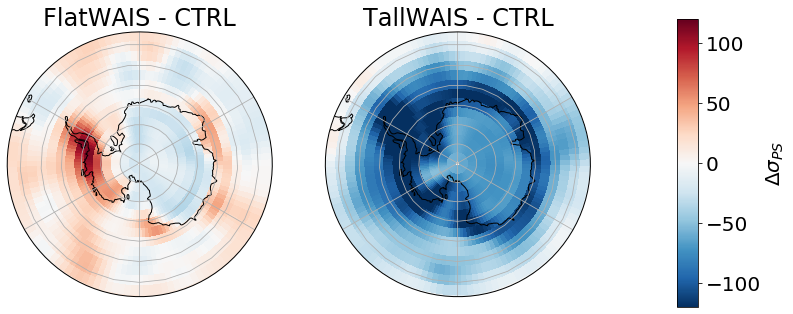

In [6]:
# Do plotting
fig = plt.figure(1, figsize=(12, 20))
ax1 = fig.add_subplot(3, 2, 1, projection=ccrs.SouthPolarStereo())
ax1.coastlines()
ax1.gridlines()
circle(ax1)
ax1.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
im1 = psfanom.plot.pcolormesh('lon','lat', ax=ax1,
                              transform=ccrs.PlateCarree(),
                             add_colorbar=False)
im1.set_clim(-120, 120)
ax1.set_title('FlatWAIS - CTRL')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.67, 0.025, 0.2])

ax2 = fig.add_subplot(3, 2, 2, projection=ccrs.SouthPolarStereo())
ax2.coastlines()
ax2.gridlines()
circle(ax2)
ax2.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
im2 = pstanom.plot.pcolormesh('lon','lat', ax=ax2,
                              transform=ccrs.PlateCarree(),
                             cbar_ax=cbar_ax,
                             cbar_kwargs={'label': '$\Delta\sigma_{PS}$',})
im2.set_clim(-120, 120)
ax2.set_title('TallWAIS - CTRL')

In [8]:
fig.savefig('../figures/simple/simple_psstd.png',
           bbox_inches='tight')